### 1. Load the dataset into python environment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. Load the dataset into python environment
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make ‘PassengerId’ as the index column

In [122]:
df=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [10]:
df.shape

(891, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [19]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### 4. Fill in all the missing values present in all the columns in the dataset

<AxesSubplot:>

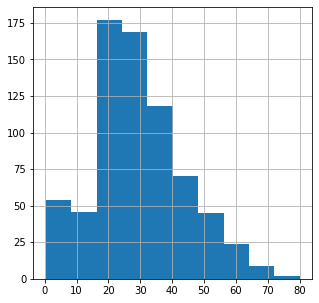

In [123]:
# null values are present in Age,Cabin and Embarked fields
# Handling null values in Age field

df['Age'].hist(figsize=(5,5))


In [124]:
#As it is right skewed, can fill the missing value with median

df['Age']= df['Age'].fillna(df['Age'].median())
df.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [125]:
#Since majority (687 records) are having nulls out of 891, we can drop the particular column
df.drop('Cabin',axis=1,inplace=True)
df.isnull().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [126]:
#As there is only 2 records are having null values in Embarked column, it wont affect much our dataset. so we can drop those
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [127]:
df.shape

(889, 10)

### 5. Check and handle outliers in at least 3 columns in the dataset

In [128]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


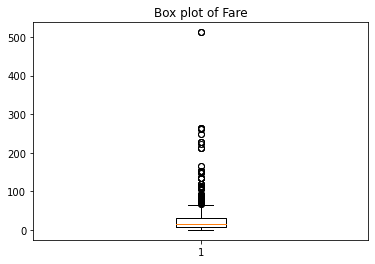

In [129]:
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')
plt.show()

In [130]:
#handling outliers using IQR
Q1=np.percentile(df['Fare'],25)
Q2=np.percentile(df['Fare'],50)
Q3=np.percentile(df['Fare'],75)
IQR = Q3-Q1
UL= Q3+IQR * 1.5
LL= Q1-IQR * 1.5
print('LL:', LL)
print('UL:', UL)

LL: -26.7605
UL: 65.6563


In [131]:
outliers = []
for i in df['Fare']:
    if (i>UL) or (i<LL):
        outliers.append(i)
    

In [132]:
outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042

In [133]:
# all outliers are greater than Upper limit
ind = df['Fare']>UL
df.drop(df.loc[ind].index,inplace=True)

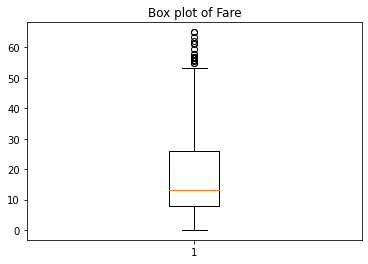

In [134]:
#replotting the boxplot again for Fare
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')
plt.show()

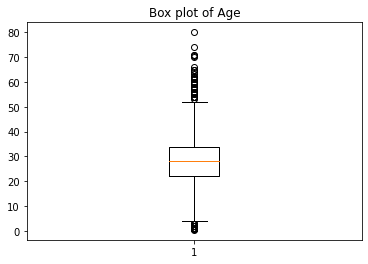

In [135]:
#Handling outliers in Age 
plt.boxplot(df['Age'])
plt.title('Box plot of Age')
plt.show()

In [136]:
#handling outliers using IQR
Q1=np.percentile(df['Age'],25)
Q2=np.percentile(df['Age'],50)
Q3=np.percentile(df['Age'],75)
IQR = Q3-Q1
UL= Q3+IQR * 1.5
LL= Q1-IQR * 1.5
print('LL:', LL)
print('UL:', UL)

LL: 4.0
UL: 52.0


In [137]:
outliers = []
for i in df['Age']:
    if (i>UL) or (i<LL):
        outliers.append(i)
    

In [157]:
outliers

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 3.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0,
 3.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 70.0,
 60.0,
 60.0,
 0.67,
 57.0,
 54.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0]

In [139]:
ind = df['Age']>UL
df.drop(df.loc[ind].index,inplace=True)

In [140]:
ind1 = df['Age']<LL
df.drop(df.loc[ind1].index,inplace=True)

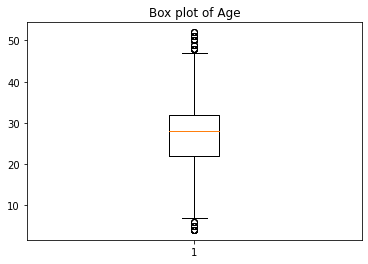

In [141]:
#replotting the box plot again
plt.boxplot(df['Age'])
plt.title('Box plot of Age')
plt.show()

In [145]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

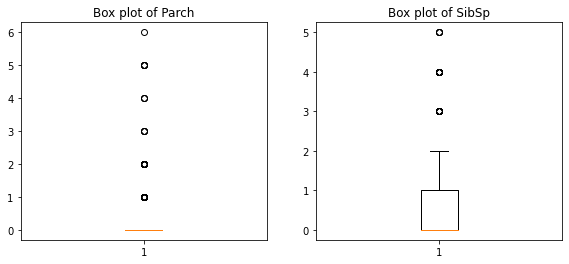

In [150]:
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.boxplot(df['Parch'])
plt.title('Box plot of Parch')
plt.subplot(132)
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp')
plt.show()

There are outliers in both the fields but the values of outliers are realistic and hence can keep as it is

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [147]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q


In [160]:

#df['Name'].nunique()
#dropping name columns as it wont help in model
df.drop('Name',axis=1,inplace=True)

In [163]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S
6,0,3,male,28.0,0,0,330877,8.4583,Q


In [165]:
#df['Ticket'].nunique()
#dropping the column ticket as it doesnot contribute to the model
df.drop('Ticket',axis=1,inplace=True)

In [167]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,28.0,0,0,8.4583,Q


Encoding the categorical features Sex and Embarked

In [170]:
df= pd.get_dummies(df)

In [171]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
6,0,3,28.0,0,0,8.4583,0,1,0,1,0


In [172]:
df.shape

(708, 11)

<AxesSubplot:>

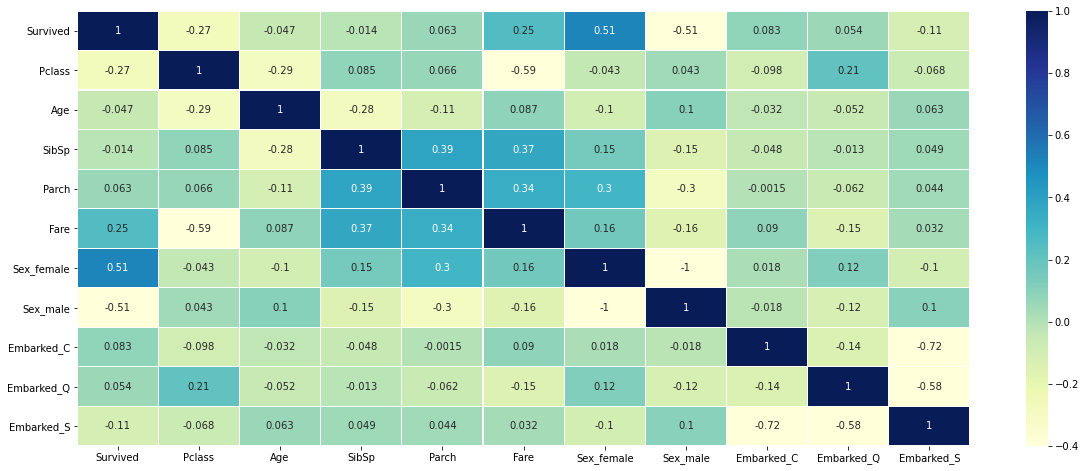

In [174]:
corrmatrix = df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.4,vmax=1,annot=True,linewidths=.2,cmap='YlGnBu')

no visible correlation with features

In [175]:
y=df['Survived']
X=df.drop('Survived',axis=1)

In [177]:
#Training the datamodel with selected features
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [178]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)# trained the model using train datasets and predicted the field 

In [179]:
#compare the MSE and R-square value
from sklearn.metrics import mean_squared_error as msr
from sklearn.metrics import r2_score
print('MSE is :',msr(y_test,prediction))
print('R2_score is  :',r2_score(y_test,prediction))

MSE is : 0.134132613406735
R2_score is  : 0.4005651558658234


Trying the model with MinMaxScaler

In [180]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X)


In [181]:
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,708.000000,708.000000,708.000000,708.00000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,0.759181,0.501089,0.079944,0.05226,0.263617,0.319209,0.680791,0.145480,0.100282,0.754237
std,0.357166,0.198046,0.168172,0.13034,0.206376,0.466500,0.466500,0.352834,0.300589,0.430843
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.000000,0.00000,0.121218,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.500000,0.000000,0.00000,0.172949,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.583333,0.200000,0.00000,0.392260,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [182]:
#running the model after scaling the data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)
print('MSE is :',msr(y_test,prediction))
print('R2_score is  :',r2_score(y_test,prediction))

MSE is : 0.13413261340673505
R2_score is  : 0.4005651558658232


No change in MSE and R2 score after scaling